In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input, Flatten, Dropout
import numpy as np

from dataset import load_hoda

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
np.random.seed(123)  # for reproducibility
X_train_orignal, y_train_orignal, X_test_orignal, y_test_orignal = load_hoda()

In [3]:
y_train = keras.utils.to_categorical(y_train_orignal,num_classes=10) # make one hot
y_test = keras.utils.to_categorical(y_test_orignal,num_classes=10)  # make one hot

In [4]:
X_train = X_train_orignal.astype('float32')
X_test = X_test_orignal.astype('float32')
X_train /= 255  # because each pixel is 0-255
X_test /= 255

In [5]:
X_train.shape

(1000, 25)

In [6]:
model = Sequential()
model.add(Input(shape=X_train[0].shape)) # or model.add(Flatten(input_shape=(5,5))) without reshaping the images
model.add(Dense(60,activation="relu"))
model.add(Dense(300,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 60)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,870 (89.34 KB)

 Trainable params: 22,870 (89.34 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(X_test, y_test))

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4430 - loss: 2.0685 - val_accuracy: 0.6550 - val_loss: 1.8186
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6970 - loss: 1.6290 - val_accuracy: 0.7700 - val_loss: 1.4104
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7810 - loss: 1.2499 - val_accuracy: 0.8100 - val_loss: 1.1057
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8290 - loss: 0.9628 - val_accuracy: 0.8300 - val_loss: 0.8690
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8430 - loss: 0.7654 - val_accuracy: 0.8250 - val_loss: 0.7189
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8490 - loss: 0.6349 - val_accuracy: 0.8450 - val_loss: 0.6180
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8580 - loss: 0.5549 - val_accuracy: 0.8300 - val_loss: 0.5539
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8690 - loss: 0.4882 - val_accuracy: 0.8550 - val_loss: 0.4949

Test Accuracy: 0.9300000071525574 
Maximum Test Acuracy During Training:  0.9300000071525574


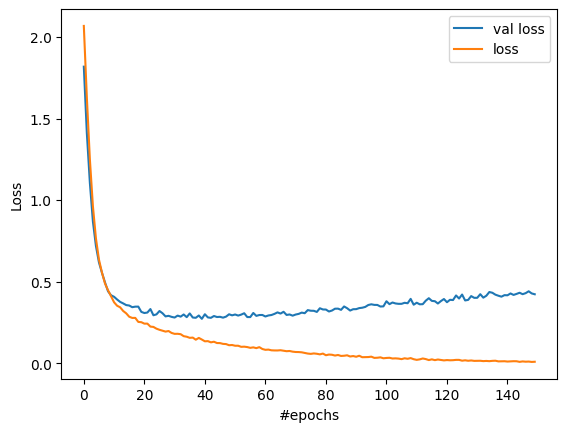

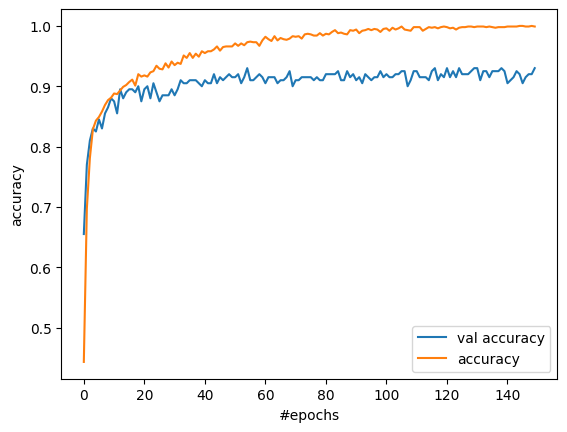

In [10]:
import matplotlib.pyplot as plt
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))
plt.figure(1)
plt.plot(history.history['val_loss'],label="val loss")
plt.plot(history.history['loss'],label="loss")
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.plot(history.history['accuracy'],label="accuracy")
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [13]:
model = Sequential()
model.add(Input(shape=X_train[0].shape)) # or model.add(Flatten(input_shape=(5,5))) without reshaping the images
model.add(Dense(60,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(300,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

import tensorflow as tf
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          epochs=150,
          batch_size=128, validation_data=(X_test, y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 60)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,870 (89.34 KB)

 Trainable params: 22,870 (89.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2290 - loss: 2.1886 - val_accuracy: 0.5700 - val_loss: 1.9654
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5010 - loss: 1.8613 - val_accuracy: 0.7400 - val_loss: 1.6470
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5810 - loss: 1.6088 - val_accuracy: 0.7750 - val_loss: 1.3777
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6640 - loss: 1.3598 - val_accuracy: 0.8200 - val_loss: 1.1320
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6870 - loss: 1.1797 - val_accuracy: 0.8650 - val_loss: 0.9500
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7220 - loss: 1.0329 - val_accuracy: 0.8650 - val_loss: 0.8110
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7600 - loss: 0.8917 - val_accuracy: 0.8750 - val_loss: 0.7037
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7660 - loss: 0.8326 - val_accuracy: 0.8800 - val_loss: 0.6280

Test Accuracy: 0.9449999928474426 
Maximum Test Acuracy During Training:  0.9449999928474426


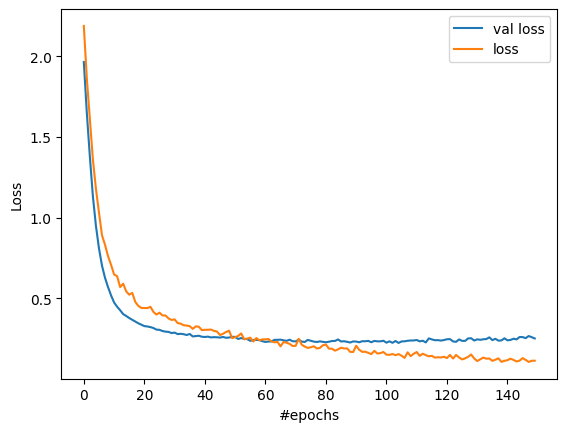

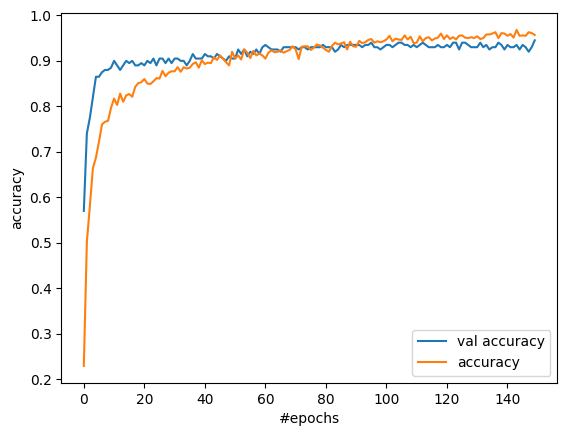

In [14]:
import matplotlib.pyplot as plt
print("Test Accuracy:",max(history.history['val_accuracy']),
      "\nMaximum Test Acuracy During Training: ", 
      max(history.history['val_accuracy']))
plt.figure(1)
plt.plot(history.history['val_loss'],label="val loss")
plt.plot(history.history['loss'],label="loss")
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.plot(history.history['accuracy'],label="accuracy")
plt.xlabel('#epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()